In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize the data and reshape for CNN
train_x = train_x.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_x = test_x.reshape(-1, 28, 28, 1).astype('float32') / 255.0


In [4]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
model.fit(train_x, train_y, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.7669 - loss: 0.6489 - val_accuracy: 0.8757 - val_loss: 0.3471
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.8821 - loss: 0.3289 - val_accuracy: 0.8875 - val_loss: 0.3069
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9019 - loss: 0.2735 - val_accuracy: 0.9022 - val_loss: 0.2745
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9116 - loss: 0.2392 - val_accuracy: 0.8966 - val_loss: 0.2771
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9230 - loss: 0.2058 - val_accuracy: 0.9063 - val_loss: 0.2604


In [8]:
# Evaluate the model
loss, acc = model.evaluate(test_x, test_y)
print("Test Loss:", loss)
print("Test Accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9014 - loss: 0.2766
Test Loss: 0.2711344361305237
Test Accuracy: 0.9016000032424927


In [9]:
# Label map for predictions
label_names = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']


In [10]:
# Predict and visualize results
def predict(id_):
    prediction = model.predict(test_x[id_:id_+1])
    predicted_label = label_names[np.argmax(prediction)]
    print("Predicted:", predicted_label)
    plt.imshow(test_x[id_].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted: coat


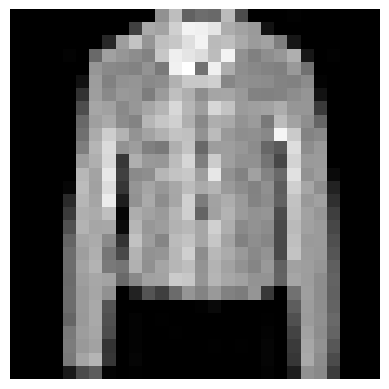

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted: sandal


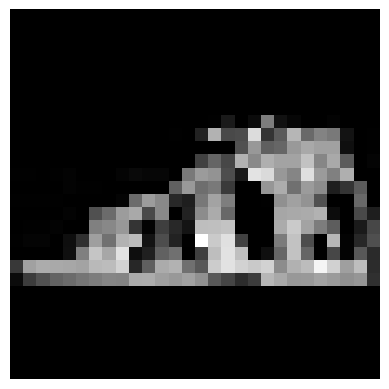

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted: sneaker


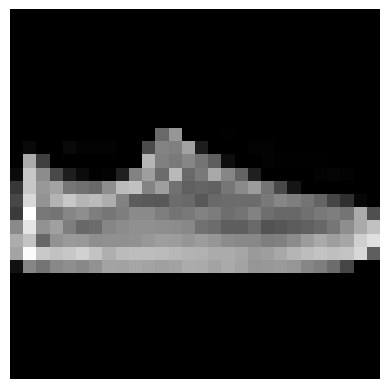

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted: dress


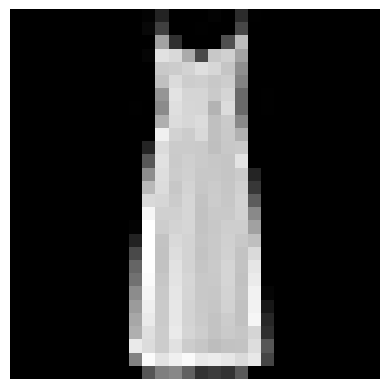

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted: coat


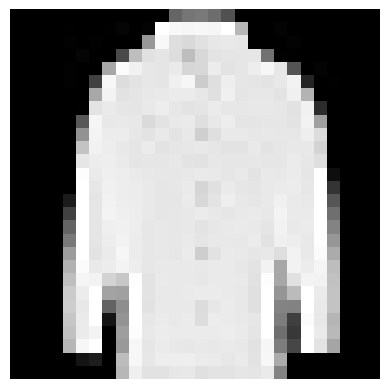

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted: trouser


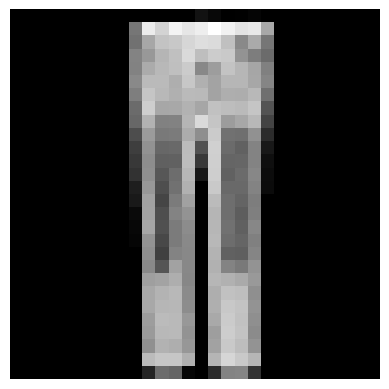

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted: pullover


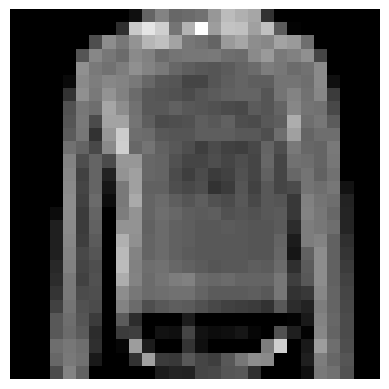

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted: coat


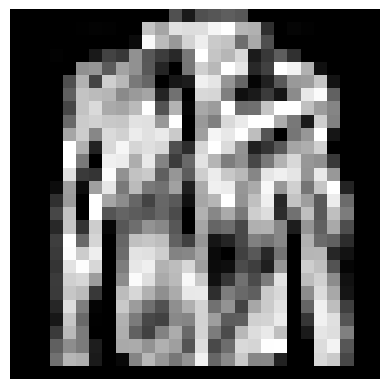

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted: bag


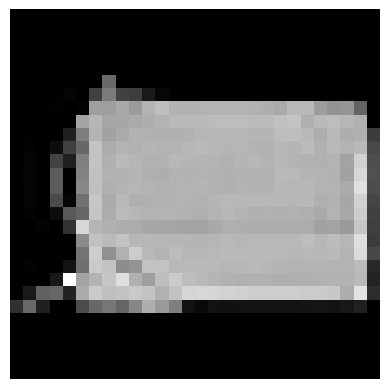

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted: t_shirt


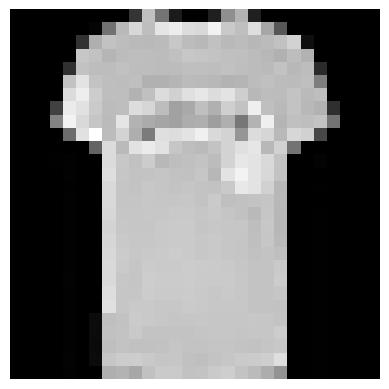

In [11]:
# Test prediction
for i in range(10, 20):
    predict(i)